<a href="https://colab.research.google.com/github/Nishant401/Housepredict/blob/main/Forest_Fire_Detection_using_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
#Importing libraries for DL and ImageProcessing
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is Available')
else:
  print('GPU Unavailable')

GPU is Available


In [ ]:
train_dir = os.path.join(path, 'the_wildfire_dataset_2n_version/train')
val_dir = os.path.join(path, 'the_wildfire_dataset_2n_version/val')
test_dir = os.path.join(path, 'the_wildfire_dataset_2n_version/test')

In [ ]:
classes = os.listdir(train_dir)
num_classes = len(classes)
print(f"Number of classes: {num_classes}")
print(f"Classes: {classes}")

Number of classes: 2
Classes: ['nofire', 'fire']


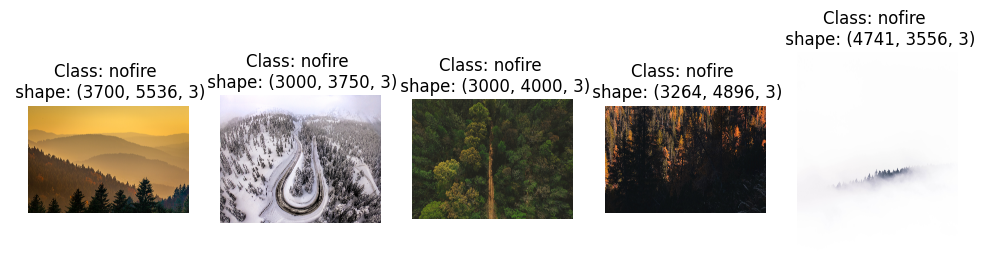

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  image_name = os.listdir(class_path)[i]
  image_path = os.path.join(class_path, image_name)
  image = plt.imread(image_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(image)
  plt.title(f"Class: {classes[0]} \n shape: {image.shape}")
  plt.axis('off')
plt.show()

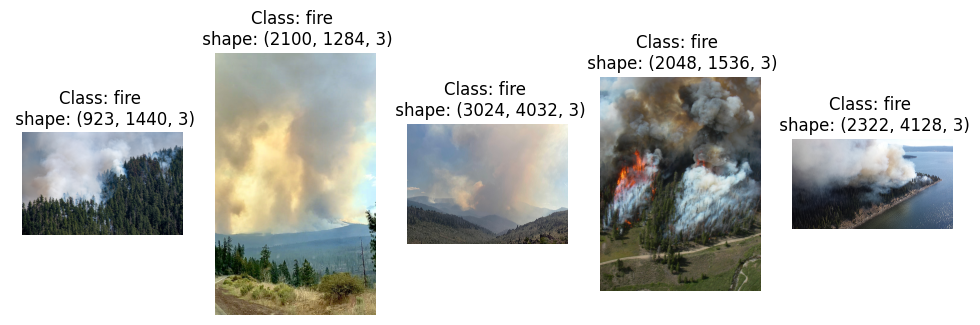

In [ ]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  image_name = os.listdir(class_path)[i]
  image_path = os.path.join(class_path, image_name)
  image = plt.imread(image_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(image)
  plt.title(f"Class: {classes[1]} \n shape: {image.shape}")
  plt.axis('off')
plt.show()

In [ ]:
# Day2- Learning about Data Preprocessing
# Image Dimensions and batch Size
img_width, img_height = 150, 150

batch_size = 32 # 32 images in a single batch when training loads of data i.e, images

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)


val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'binary',
    shuffle = True
)




Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
# mapping the indices

class_mapping = train_generator.class_indices
print(class_mapping)


# Extract the class Names
class_names = list(class_mapping.keys())
print('Class Names:',class_names)

{'fire': 0, 'nofire': 1}
Class Names: ['fire', 'nofire']


In [ ]:
# Developing the CNN Model

model = Sequential(
    [
        Input(shape=(img_width, img_height, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 12,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 9/58 ━━━━━━━━━━━━━━━━━━━━ 4:54 6s/step - accuracy: 0.5714 - loss: 1.6466

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


24/58 ━━━━━━━━━━━━━━━━━━━━ 3:31 6s/step - accuracy: 0.5835 - loss: 1.2377

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


58/58 ━━━━━━━━━━━━━━━━━━━━ 462s 8s/step - accuracy: 0.6189 - loss: 0.9478 - val_accuracy: 0.7604 - val_loss: 0.5010
Epoch 2/5
 1/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7812 - loss: 0.5103

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


58/58 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7812 - loss: 0.5103 - val_accuracy: 0.7266 - val_loss: 0.5102
Epoch 3/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 478s 8s/step - accuracy: 0.7278 - loss: 0.5202 - val_accuracy: 0.7057 - val_loss: 0.5332
Epoch 4/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.8125 - loss: 0.4087 - val_accuracy: 0.7161 - val_loss: 0.5131
Epoch 5/5
58/58 ━━━━━━━━━━━━━━━━━━━━ 439s 8s/step - accuracy: 0.7659 - loss: 0.4766 - val_accuracy: 0.7526 - val_loss: 0.4989


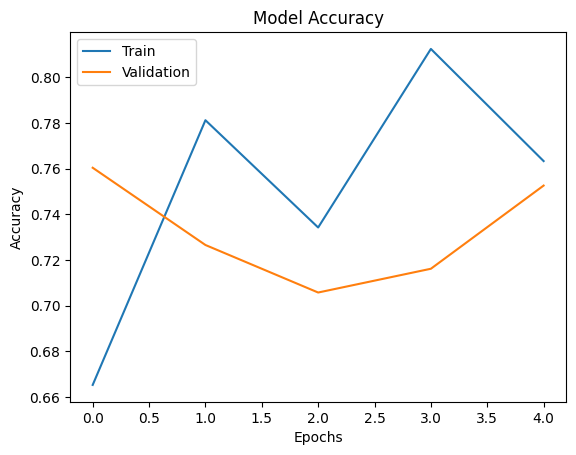

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

 7/12 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - accuracy: 0.7700 - loss: 0.4612

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


10/12 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.7795 - loss: 0.4486

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.7863 - loss: 0.4411
Test Accuracy: 0.8099


In [18]:
model.save('FFD.keras')

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model = load_model('FFD.keras')

# Predict on new image - create a function
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)
  if prediction[0] > 0.5:
    predicted_class = class_names[1]
  else:
    predicted_class = class_names[0]

  plt.imshow(img)
  plt.title(f'Predicted: {predicted_class}')
  plt.axis('off')
  plt.show()

In [20]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

['josh-sorenson-w_QAjcf1ipU-unsplash.jpg',
 'balazs-busznyak-AhMSy4GpU0w-unsplash.jpg',
 '52358616216_ec885ff145_o.jpg',
 'matthias-heil-T7lMR-syZAg-unsplash.jpg',
 'mark-boss-KG8N1Rqf02w-unsplash.jpg',
 'chris-barbalis-SIbpq4Lvzdk-unsplash.jpg',
 'brendan-beale-h3qe4EZd4_4-unsplash.jpg',
 'dan-rogers-G807nWEuFIo-unsplash.jpg',
 'hala-alghanim-yyE90v_E8dA-unsplash.jpg',
 'zetong-li-79sabz_JrXg-unsplash.jpg',
 'federico-bottos-JUFuI-kBtas-unsplash.jpg',
 'single-earth-FP5tOXT6aMs-unsplash.jpg',
 'sunnie-KJ_G43MHDf0-unsplash.jpg',
 '35581707273_fed23248e8_o.jpg',
 'martin-sanchez-ML6kHR--Uys-unsplash.jpg',
 'marek-piwnicki-DCGABYDIdT0-unsplash.jpg',
 'austin-schmid-zQ-y4Gj8194-unsplash.jpg',
 'rhema-kallianpur-t0GpJ2cdJuo-unsplash.jpg',
 'victor-rodriguez-e5g9otcYzkU-unsplash.jpg',
 'kristaps-ungurs-7aY6JOyFY8A-unsplash.jpg',
 '52452040025_916ddf3f9d_o.jpg',
 'daniil-silantev-VggwSJxYlAw-unsplash.jpg',
 'josh-withers-UN_W3z4D0pw-unsplash.jpg',
 'dave-hoefler-swH_IVJGLDA-unsplash.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


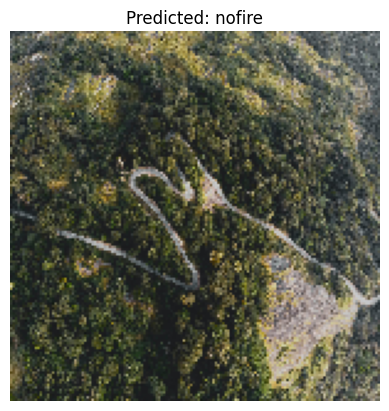

In [21]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/smaran-alva-yOj9j2Ho-kE-unsplash.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


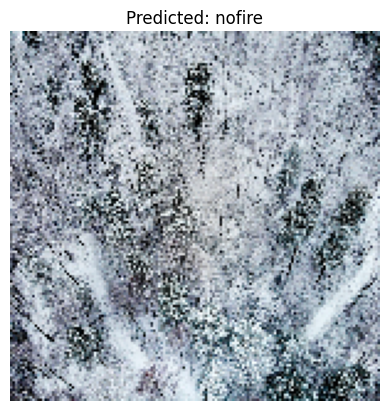

In [22]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/stories-tNhGCix_HvA-unsplash.jpg')

In [23]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire')

['29071683967_b1ed99cb89_o.jpg',
 '9570772331_0822c9b670_o.jpg',
 'malachi-brooks-lhZ61YqYhnA-unsplash.jpg',
 '28537699003_1a422593ca_o.jpg',
 '51404893429_95e004cb03_o.jpg',
 '26131736898_9e6a8cd68f_o.jpg',
 '50622961901_b344261876_o.jpg',
 '35410741240_4dde737981_o.jpg',
 '20960888741_8c4be2c1df_o.jpg',
 '52230132421_efbcf13fe2_o.png',
 '52291063924_0a29bb857f_o.jpg',
 '9600858470_9d349a2271_o.jpg',
 '52390706166_2ef8a61765_o.jpg',
 '37342470222_39ab7a0005_o.jpg',
 '19196558588_267f24b847_o.jpg',
 '50622019883_c988dcf6ba_o.jpg',
 '33116128054_0169df2131_o.jpg',
 '32923781413_197187fc02_o.jpg',
 '50380847162_24a484981b_o.jpg',
 '52561565423_bbc7b2daf8_o.jpg',
 '27389369514_cd30397ac2_o.jpg',
 '51339519791_6c87189d8b_o.jpg',
 '26549039025_b4cce14ec7_o.jpg',
 '51840740529_300582b71b_o.jpg',
 '36171933842_96ffbd3205_o.jpg',
 '51236039150_95c87d9260_o.jpg',
 '8469662828_371dbcb70d_o.jpg',
 '52871185823_2561dcb25a_o.jpg',
 '28347651877_ce21ed134e_o.png',
 '35436611810_9b938fc10c_o.jpg',
 '

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


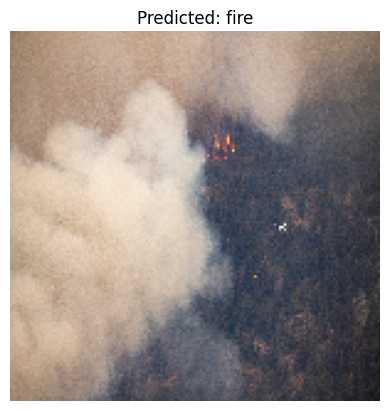

In [24]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/fire/28431975607_7fc4cc466c_o.jpg')